**Doug Marcum  
DSC 550 - Exercise 11.2 - Original Analysis Case Study Final Documentation**

### Case Study: Analyze data to evaluate cereal information to predict consumer rating  

This course has occurred at a time of global high stress, so this project is to be something lighthearted. I reviewed many medical, political, and sports focused datasets that all just seemed to serious. Luckily, I stumbled on the topic of cereal, an interesting and somewhat silly topic. The data for this case study is a list of numerous brands of cereal by multiple manufactures. While not all encompassing, the data is comprehensive enough to predict how a cereal might score with a consumer based on several variables/features.

In [1]:
# load libraries
import pandas as pd
import numpy as np
import yellowbrick
import matplotlib.pyplot as plt

## Part 1
**1. Load Data**  

The originally data can be found on Kaggle.com (https://www.kaggle.com/crawford/80-cereals/download). Load downloaded CSV file. Display first five rows to make certain data loaded properly and explore columns.

In [2]:
df = pd.read_csv('cereal.csv')
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


**2. Variables**      

    name: name of cereal  
    mfr: manufacturer of cereal
        A = American Home Food Products  
        G = General Mills  
        K = Kelloggs  
        N = Nabisco  
        P = Post  
        Q = Quaker Oats  
        R = Ralston Purina   
    type:  
        C = cold  
        H = hot  
    calories: calories per serving  
    protein: grams of protein  
    fat: grams of fat  
    sodium: milligrams of sodium  
    fiber: grams of dietary fiber  
    carbo: grams of complex carbohydrates  
    sugars: grams of sugars  
    potass: milligrams of potassium  
    vitamins: vitamins and minerals - 0, 25, or 100, indicating the typical percentage of FDA recommended  
    shelf: display shelf (1 = bottom, 2 = middle, or 3 = top, counting from the floor)  
    weight: weight in ounces of one serving  
    cups: number of cups in one serving  
    rating: rating of cereals from Consumer Reports  

**3. Display dimensions and information of data frame** 

In [3]:
# display shape
print('Shape:', df.shape)
print('')

# display info
print('Info:')
print(df.info())

Shape: (77, 16)

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB
None


**4. Check for missing values**

In [4]:
# quick function to look for missing values in each column
def miss_values(df):
    for c in df.columns:
        miss = df[c].isnull().sum() 
        if miss > 0: 
            print(f'Missing value(s) for {c}: {miss}') 
        else: 
            print(f'0 missing values for {c}')

# check if any columns are null
miss_values(df)

0 missing values for name
0 missing values for mfr
0 missing values for type
0 missing values for calories
0 missing values for protein
0 missing values for fat
0 missing values for sodium
0 missing values for fiber
0 missing values for carbo
0 missing values for sugars
0 missing values for potass
0 missing values for vitamins
0 missing values for shelf
0 missing values for weight
0 missing values for cups
0 missing values for rating


**5. Run summary information on data (total, mean, min, max, freq, unique, etc.)**

In [5]:
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,106.883117,2.545455,1.012987,159.675325,2.151948,14.597403,6.922078,96.077922,28.246753,2.207792,1.029610,0.821039,42.665705
std,19.484119,1.094790,1.006473,83.832295,2.383364,4.278956,4.444885,71.286813,22.342523,0.832524,0.150477,0.232716,14.047289
min,50.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,130.000000,1.000000,12.000000,3.000000,40.000000,25.000000,1.000000,1.000000,0.670000,33.174094
50%,110.000000,3.000000,1.000000,180.000000,2.000000,14.000000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.400208
75%,110.000000,3.000000,2.000000,210.000000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.828392
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [6]:
df.describe(include=['O'])

,name,mfr,type
count,77,77,77
unique,77,7,2
top,Cinnamon Toast Crunch,K,C
freq,1,23,74


**6. Fields showing -1 are not possible values for sugar, carbohydrates, and potassium. It is believed that these values may have been entered to replace previous NaN values. Since 0 is an acceptable value for these columns, cereals with -1 values are dropped.**

In [7]:
# drop cereals with -1 values
df = df[df.carbo != -1]
df = df[df.sugars != -1]
df = df[df.potass != -1]

**7. Create 'score' variable, grouping cereals into 3 scoring possibilities.**  

        2 = Cereals with a consumer rating in the 75th or higher quantile  
        1 = Cereals with a consumer rating in the 25th - 75th quantile   
        0 = Cereals with a consumer rating in the 25th or lower quantile 
   
**From this, 'score' is the target and the other variables will be features.**

In [8]:
# quick overview of updated data
df.describe()

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,107.027027,2.513514,1.000000,162.364865,2.175676,14.729730,7.108108,98.513514,29.054054,2.216216,1.030811,0.821622,42.371787
std,19.843893,1.075802,1.006826,82.769787,2.423391,3.891675,4.359111,70.878681,22.294352,0.832067,0.153416,0.235715,14.033712
min,50.000000,1.000000,0.000000,0.000000,0.000000,5.000000,0.000000,15.000000,0.000000,1.000000,0.500000,0.250000,18.042851
25%,100.000000,2.000000,0.000000,135.000000,0.250000,12.000000,3.000000,41.250000,25.000000,1.250000,1.000000,0.670000,32.449210
50%,110.000000,2.500000,1.000000,180.000000,2.000000,14.500000,7.000000,90.000000,25.000000,2.000000,1.000000,0.750000,40.253087
75%,110.000000,3.000000,1.000000,217.500000,3.000000,17.000000,11.000000,120.000000,25.000000,3.000000,1.000000,1.000000,50.520610
max,160.000000,6.000000,5.000000,320.000000,14.000000,23.000000,15.000000,330.000000,100.000000,3.000000,1.500000,1.500000,93.704912


In [9]:
# loop to create list of possible scores based on quantile
scores = []
for i in df['rating']:
    if i >= df.rating.quantile(.75):
        scores.append(2)
    elif i >= df.rating.quantile(.25):
        scores.append(1)
    else:
        scores.append(0)
        
# add 'scores' column to df
df['scores'] = scores

# check for missing values
miss_values(df)

0 missing values for name
0 missing values for mfr
0 missing values for type
0 missing values for calories
0 missing values for protein
0 missing values for fat
0 missing values for sodium
0 missing values for fiber
0 missing values for carbo
0 missing values for sugars
0 missing values for potass
0 missing values for vitamins
0 missing values for shelf
0 missing values for weight
0 missing values for cups
0 missing values for rating
0 missing values for scores


**8. Plot histograms to display and explore data**

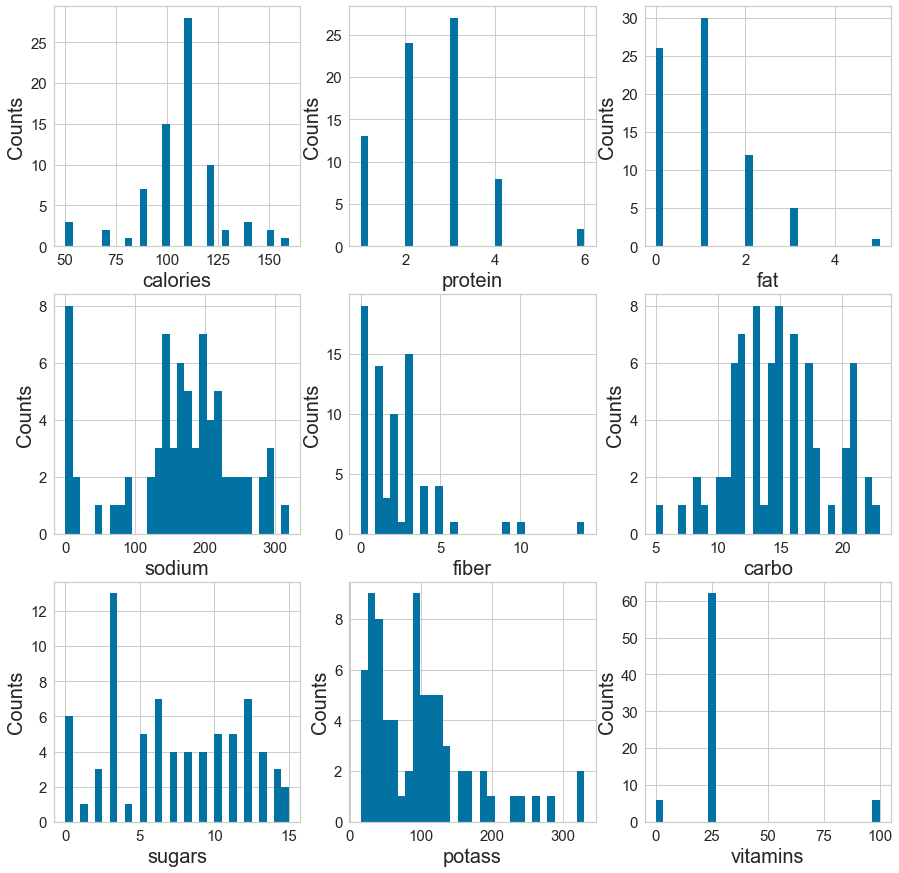

In [10]:
# set up the figure size
plt.rcParams['figure.figsize'] = (15, 15)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 3)

# Specify the features of interest
num_features = ['calories', 'protein', 'fat', 'sodium', 'fiber', 'carbo', 'sugars', 'potass', 'vitamins']
xaxes = num_features
yaxes = ['Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts', 'Counts']

# draw histograms
axes = axes.ravel()
for idx, ax in enumerate(axes):
    ax.hist(df[num_features[idx]].dropna(), bins=30)
    ax.set_xlabel(xaxes[idx], fontsize=20)
    ax.set_ylabel(yaxes[idx], fontsize=20)
    ax.tick_params(axis='both', labelsize=15)
plt.show()

**9. Plot box charts for data with fewer variables**

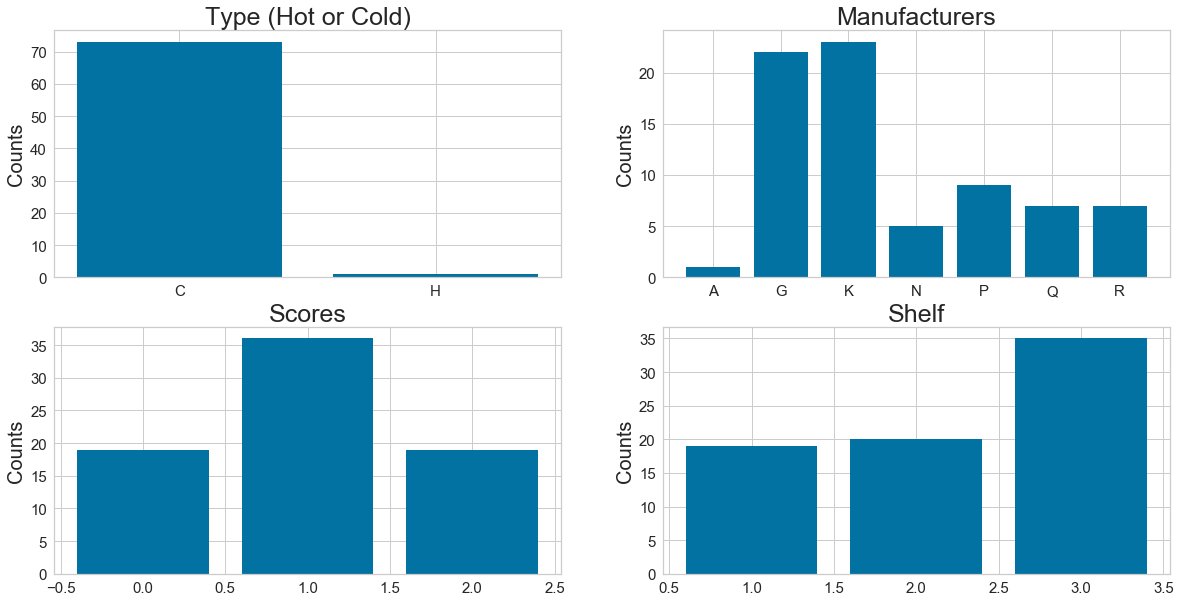

In [11]:
# set up the figure size
plt.rcParams['figure.figsize'] = (20, 10)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visulizer
X_Type = df.groupby('type').size().reset_index(name='Counts')['type']
Y_Type = df.groupby('type').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 0].bar(X_Type, Y_Type)
axes[0, 0].set_title('Type (Hot or Cold)', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_MFR = df.groupby('mfr').size().reset_index(name='Counts')['mfr']
Y_MFR = df.groupby('mfr').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[0, 1].bar(X_MFR, Y_MFR)
axes[0, 1].set_title('Manufacturers', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_SCORE = df.groupby('scores').size().reset_index(name='Counts')['scores']
Y_SCORE = df.groupby('scores').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 0].bar(X_SCORE, Y_SCORE)
axes[1, 0].set_title('Scores', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)

# make the data read to feed into the visulizer
X_SHELF = df.groupby('shelf').size().reset_index(name='Counts')['shelf']
Y_SHELF = df.groupby('shelf').size().reset_index(name='Counts')['Counts']

# make the bar plot
axes[1, 1].bar(X_SHELF, Y_SHELF)
axes[1, 1].set_title('Shelf', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)

plt.show()

**10. Use Pearson Ranking charts to see what data is correlated**

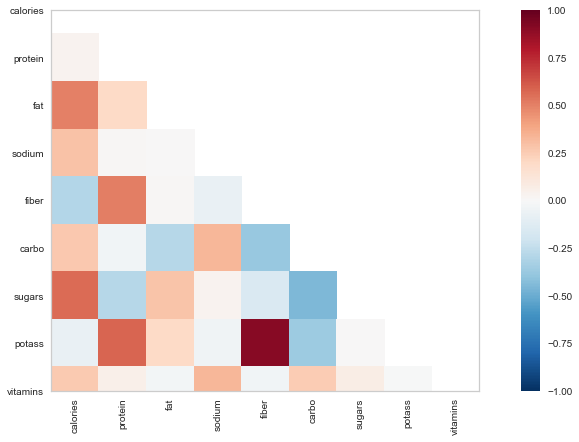

In [12]:
plt.rcParams['figure.figsize'] = (15, 7)

# import the package for visulization of the correlation
from yellowbrick.features import Rank2D

# extract the numpy arrays from the data frame
X = df[num_features].values

# instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=num_features, algorithm='pearson')
#  Fit the data to the visualizer
visualizer.fit(X)        

# Transform the data
visualizer.transform(X)

# Draw/show/poof the data
#visualizer.poof(outpath="pcoords1.png") 

plt.show()

**11. Parallel Coordinates visualization is used to compare the distributions of numerical variables between cereals with high, average, and low scores.**

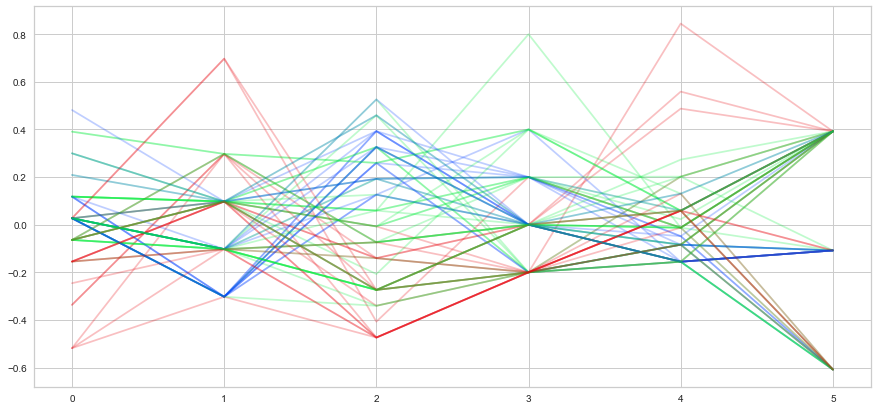

In [13]:
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates

# Specify the features of interest and the classes of the target
classes = ['Low', 'Average', 'High']
num_features = ['calories', 'protein', 'sugars', 'fat', 'fiber', 'shelf']

# copy data to a new dataframe
data_norm = df.copy()

# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].mean(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = df.scores.values

# Instantiate the visualizer
visualizer = ParallelCoordinates(classes = classes, features = num_features)
visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
#visualizer.poof(outpath="pcoords2.png") # Draw/show/poof the data

plt.show()

**12. Stack Bar Charts are used to compare cereals of which scored high, average, and low based on the other variables**

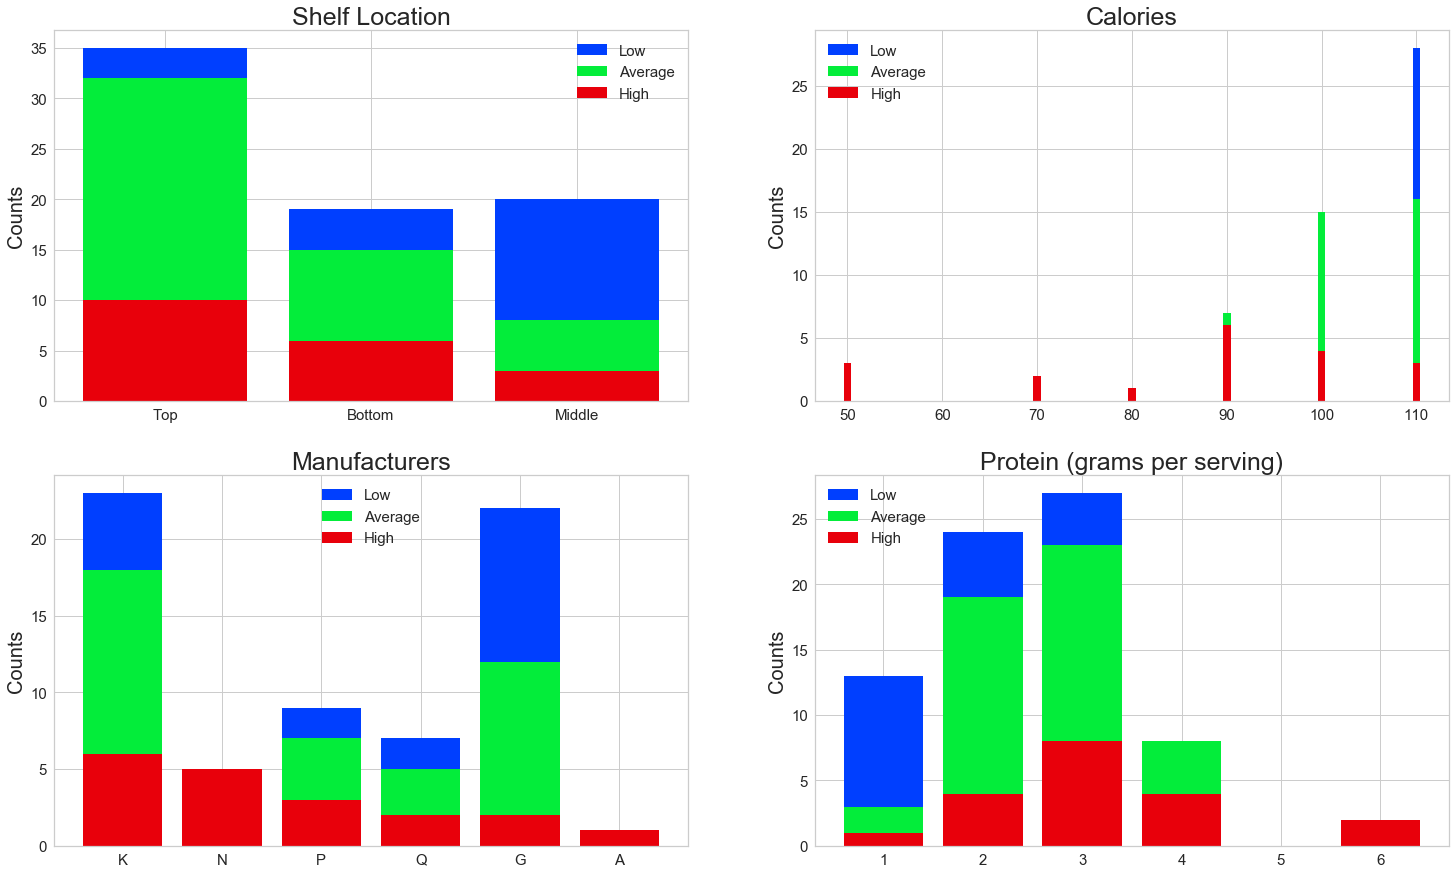

In [14]:
plt.rcParams['figure.figsize'] = (25, 15)

# make subplots
fig, axes = plt.subplots(nrows = 2, ncols = 2)

# make the data read to feed into the visualizer
shelf_high = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}}).replace({'shelf': {1: 'Bottom', 2: 'Middle', 3: 'Top'}})[df['scores']==2]['shelf'].value_counts()
shelf_avg = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}}).replace({'shelf': {1: 'Bottom', 2: 'Middle', 3: 'Top'}})[df['scores']==1]['shelf'].value_counts()
shelf_avg = shelf_avg.reindex(index = shelf_high.index)
shelf_low = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}}).replace({'shelf': {1: 'Bottom', 2: 'Middle', 3: 'Top'}})[df['scores']==0]['shelf'].value_counts()
shelf_low = shelf_low.reindex(index = shelf_high.index)

# make the bar plot
p1 = axes[0, 0].bar(shelf_low.index, shelf_low.values, bottom = shelf_high.values + shelf_avg.values)
p2 = axes[0, 0].bar(shelf_avg.index, shelf_avg.values, bottom = shelf_high.values)
p3 = axes[0, 0].bar(shelf_high.index, shelf_high.values)
axes[0, 0].set_title('Shelf Location', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0], p3[0]), ('Low', 'Average', 'High'), fontsize = 15)

cal_high = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==2]['calories'].value_counts()
cal_avg = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==1]['calories'].value_counts()
cal_avg = cal_avg.reindex(index = cal_high.index)
cal_low = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==0]['calories'].value_counts()
cal_low = cal_low.reindex(index = cal_high.index)

# make the bar plot
p4 = axes[0, 1].bar(cal_low.index, cal_low.values, bottom = cal_high.values + cal_avg.values)
p5 = axes[0, 1].bar(cal_avg.index, cal_avg.values, bottom = cal_high.values)
p6 = axes[0, 1].bar(cal_high.index, cal_high.values)
axes[0, 1].set_title('Calories', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p4[0], p5[0], p6[0]), ('Low', 'Average', 'High'), fontsize = 15, loc = 'upper left')

# make the data read to feed into the visualizer
high = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==2]['mfr'].value_counts()
average = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==1]['mfr'].value_counts()
average = average.reindex(index = high.index)
low = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==0]['mfr'].value_counts()
low = low.reindex(index = high.index)

# make the bar plot
p7 = axes[1, 0].bar(low.index, low.values, bottom = high.values + average.values)
p8 = axes[1, 0].bar(average.index, average.values, bottom = high.values)
p9 = axes[1, 0].bar(high.index, high.values)
axes[1, 0].set_title('Manufacturers', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p7[0], p8[0], p9[0]), ('Low', 'Average', 'High'), fontsize = 15)

# make the data read to feed into the visualizer
p_high = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==2]['protein'].value_counts()
p_average = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==1]['protein'].value_counts()
p_average = p_average.reindex(index = p_high.index)
p_low = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})[df['scores']==0]['protein'].value_counts()
p_low = p_low.reindex(index = p_high.index)

# make the bar plot
p10 = axes[1, 1].bar(p_low.index, p_low.values, bottom = p_high.values + p_average.values)
p11 = axes[1, 1].bar(p_average.index, p_average.values, bottom = p_high.values)
p12 = axes[1, 1].bar(p_high.index, p_high.values)
axes[1, 1].set_title('Protein (grams per serving)', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p10[0], p11[0], p12[0]), ('Low', 'Average', 'High'), fontsize = 15)

plt.show()

## Part 2
**13. Transform 'fiber' and 'potass' since both were skewed heavily in previous observation.**

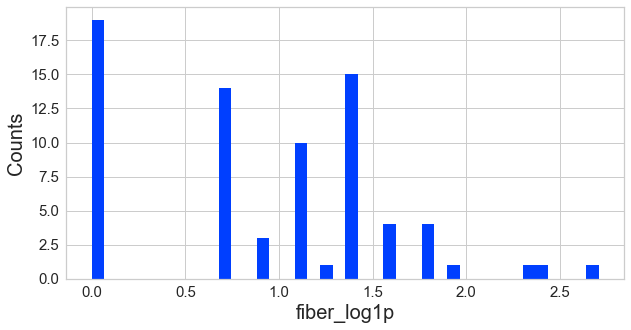

In [15]:
 # log-transformation
def log_transformation(df):
    return df.apply(np.log1p)

# fiber
df['fiber_log1p'] = log_transformation(df['fiber'])

plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(df['fiber_log1p'], bins=40)
plt.xlabel('fiber_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)
plt.show()

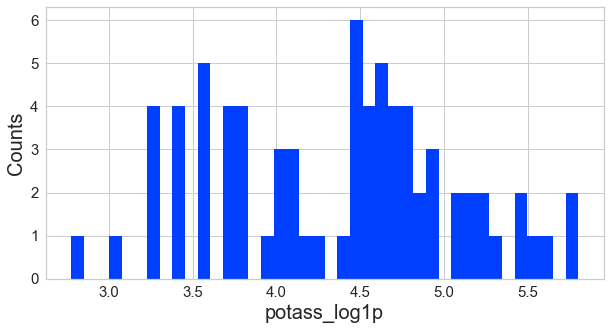

In [16]:
# potass
df['potass_log1p'] = log_transformation(df['potass'])

plt.rcParams['figure.figsize'] = (10, 5)
plt.hist(df['potass_log1p'], bins=40)
plt.xlabel('potass_log1p', fontsize=20)
plt.ylabel('Counts', fontsize=20)
plt.tick_params(axis='both', labelsize=15)

**14. Perform feature reduction using LassoCV**

Best alpha using LassoCV: 0.020203
Best score using LassoCV: 0.825267
Total number of features before elimination: 12
Number of features eliminated: 3
Number of features remaining: 9


Text(0.5, 1.0, 'Feature Importance Using Lasso Model')

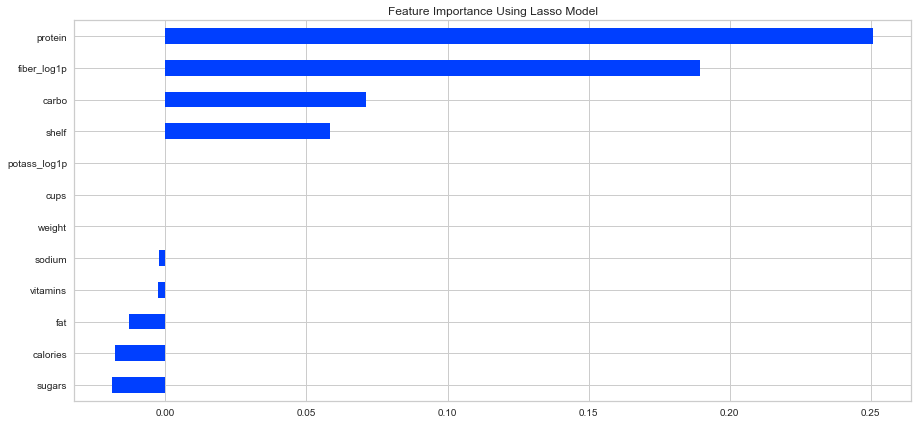

In [17]:
# import needed package
from sklearn.linear_model import LassoCV

# X is feature matrix
# dropping categotical features (name, mfr, type), dropping 'fiber' & 'potass' since using log1p for each, dropping 
# target score, as well as rating, since score is a directly derived from rating
X = df.drop(['scores', 'rating', 'name', 'mfr', 'type', 'fiber', 'potass'], axis = 1)

# y is target
y = df['scores']

# fit the model and show alpha and score
# LassoVC is a Lasso linear model with iterative fitting along a regularization path, and 
# the best model is selected by cross-validation.
reg = LassoCV(cv = 5)
reg.fit(X, y)
print('Best alpha using LassoCV: %f' % reg.alpha_)
print('Best score using LassoCV: %f' % reg.score(X,y))

# create series of coef values after running model
# irrelevant features in Lasso have coefficient turned to zero (0)
coef = pd.Series(reg.coef_, index = X.columns)
print('Total number of features before elimination:', len(coef))
print('Number of features eliminated:', sum(coef == 0))
print('Number of features remaining:', sum(coef != 0))

# plot features coefs 
imp_coef = coef.sort_values()
plt.rcParams['figure.figsize'] = (15, 7)
imp_coef.plot(kind = 'barh')
plt.title("Feature Importance Using Lasso Model")

**15. Convert categorical variables ('mfr', 'type') to numeric**

In [18]:
# convert categorical data to numbers
# get the categorical data
cat_features = ['mfr', 'type']
df_cat = df[cat_features]

# One Hot Encoding 
df_cat_dummies = pd.get_dummies(df_cat)

# check the data
print(df_cat_dummies.head())

   mfr_A  mfr_G  mfr_K  mfr_N  mfr_P  mfr_Q  mfr_R  type_C  type_H
0      0      0      0      1      0      0      0       1       0
1      0      0      0      0      0      1      0       1       0
2      0      0      1      0      0      0      0       1       0
3      0      0      1      0      0      0      0       1       0
5      0      1      0      0      0      0      0       1       0


## Part 3
**16. Training - Data is split into two sets: Training and Testing**

In [19]:
# Create a features dataset that can be used for train and validation data splitting
# here we will combine the numerical features and the dummie features together
features_model = ['protein', 'carbo', 'fiber_log1p', 'shelf', 'sodium', 'vitamins', 'calories', 'sugars', 'fat']
df_model_X = pd.concat([df[features_model], df_cat_dummies], axis=1)

# create a whole target dataset that can be used for train and validation data splitting
df_model_y = df.replace({'scores': {2: 'High', 1: 'Average', 0: 'Low'}})['scores']

# separate data into training and validation and check the details of the datasets
# import packages
from sklearn.model_selection import train_test_split

# split the data
X_train, X_val, y_train, y_val = train_test_split(df_model_X, df_model_y, test_size = 0.3, random_state = 40)

# number of samples in each set
print("Samples in training set: ", X_train.shape[0])
print("Samples in testing set:", X_val.shape[0])

# High, Average, Low
print('')
print('Counts of High, Average, and Low scores in the training set:')
print(y_train.value_counts())
print('')
print('Counts of High, Average, and Low scores in the validation set:')
print(y_val.value_counts())

Samples in training set:  51
Samples in testing set: 23

Counts of High, Average, and Low scores in the training set:
Average    26
Low        13
High       12
Name: scores, dtype: int64

Counts of High, Average, and Low scores in the validation set:
Average    10
High        7
Low         6
Name: scores, dtype: int64


**17. Evaluation of model using Confusion Matrix, Precisions, Recall, F1 Score, and ROC Curve**

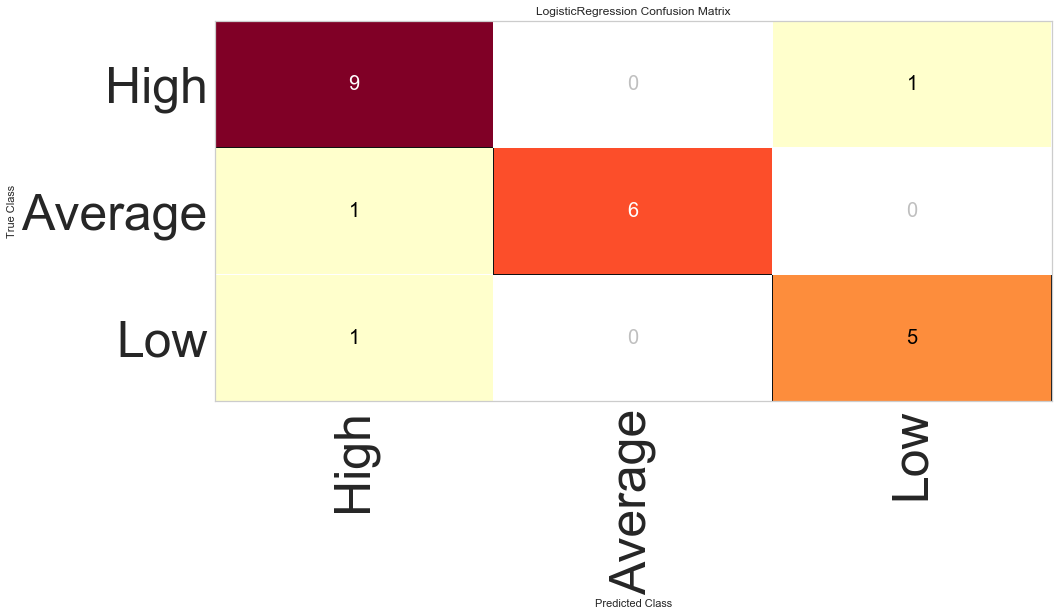

In [20]:
# Step 15 - Eval Metrics
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate the classification model 
model = LogisticRegression(multi_class = 'auto', solver = 'liblinear')

# The ConfusionMatrix visualizer
classes = ['High', 'Average', 'Low']
cm = ConfusionMatrix(model, classes = classes, percent = False)

# Fit fits the passed model
cm.fit(X_train, y_train)

# Score runs predict() on the data and then creates the confusion_matrix from scikit learn.
cm.score(X_val, y_val)

# change fontsize of the labels in the figure
for label in cm.ax.texts:
    label.set_size(20)
    
cm.poof()

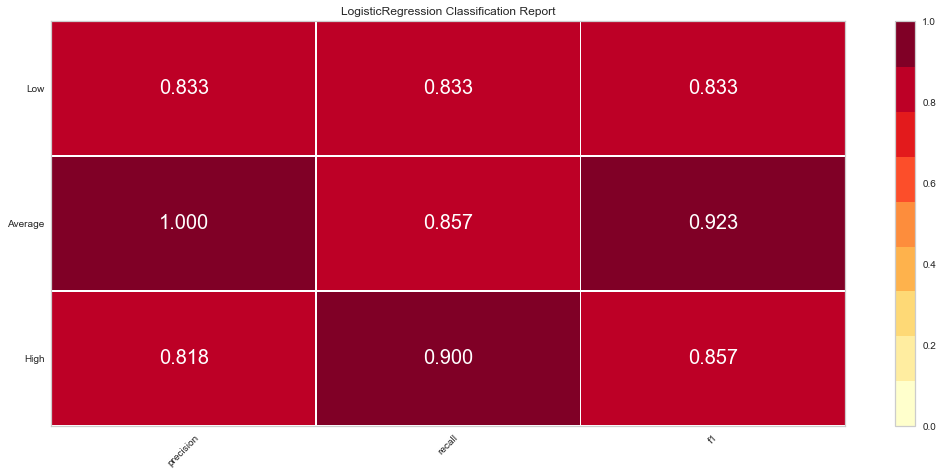

In [21]:
# Precision, Recall, and F1 Score
# set the size of the figure and the font size
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 20

# Instantiate the visualizer
visualizer = ClassificationReport(model, classes = classes)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_val, y_val)  
visualizer.poof()

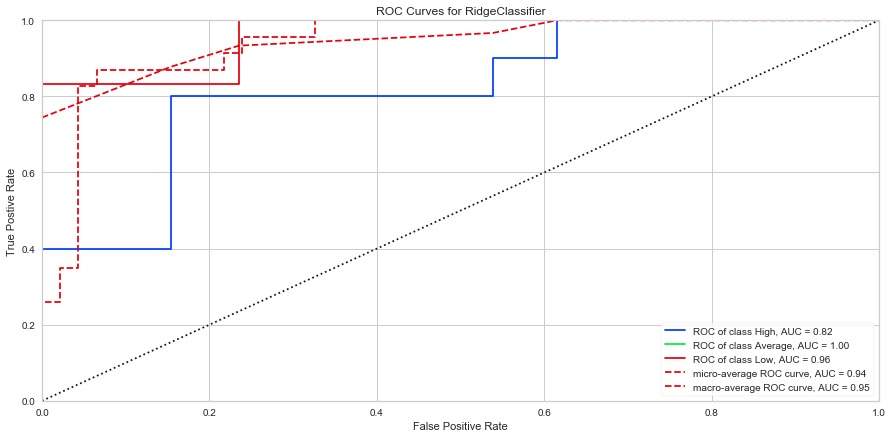

In [22]:
# ROC and AUC
# Instantiate the visualizer
# Classifier using Ridge regression. This classifier first converts the target values into {-1, 1} and then 
# treats the problem as a regression task (multi-output regression in the multiclass case).
model = RidgeClassifier()
visualizer = ROCAUC(model, classes = classes)
# Fit the training data to the visualizer
visualizer.fit(X_train, y_train)  
# Evaluate the model on the test data
visualizer.score(X_val, y_val)  
visualizer.poof()